In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

image_dir = "/content/dataset/images"
label_dir = "/content/dataset/labels"
output_dir = "/content/dataset"

for folder in ['train', 'val']:
    os.makedirs(f"{output_dir}/images/{folder}", exist_ok=True)
    os.makedirs(f"{output_dir}/labels/{folder}", exist_ok=True)

images = [f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.png', '.jpeg'))]

train_images, val_images = train_test_split(images, test_size=0.2, random_state=42)

for img_list, split in [(train_images, "train"), (val_images, "val")]:
    for img in img_list:

        shutil.move(f"{image_dir}/{img}", f"{output_dir}/images/{split}/{img}")

        label = img.replace('.jpg', '.txt').replace('.png', '.txt').replace('.jpeg', '.txt')
        shutil.move(f"{label_dir}/{label}", f"{output_dir}/labels/{split}/{label}")

print("Data split into train and val sets.")


Data split into train and val sets.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install ultralytics

In [ ]:
from ultralytics import YOLO

# Train YOLOv8
model = YOLO("yolov8n.pt")  # Use the desired YOLOv8 model size: n, s, m, l, or x
model.train(data="/content/dataset/dataset.yaml", epochs=50, imgsz=640)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 194MB/s]


Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/dataset/dataset.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_bo

100%|██████████| 755k/755k [00:00<00:00, 37.4MB/s]


Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 176MB/s]


AMP: checks passed ✅


train: Scanning /content/dataset/labels/train... 45 images, 0 backgrounds, 0 corrupt: 100%|██████████| 45/45 [00:00<00:00, 1508.97it/s]

train: New cache created: /content/dataset/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.23 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/dataset/labels/val... 12 images, 0 backgrounds, 0 corrupt: 100%|██████████| 12/12 [00:00<00:00, 424.83it/s]

val: New cache created: /content/dataset/labels/val.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.22G      1.508      3.503      1.384         58        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.81s/it]

                   all         12         26    0.00639      0.439      0.221      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.18G      1.341      3.437      1.411         43        640: 100%|██████████| 3/3 [00:00<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.23it/s]

                   all         12         26    0.00793      0.424      0.267      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.18G      1.365      3.297      1.361         72        640: 100%|██████████| 3/3 [00:00<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.69it/s]

                   all         12         26     0.0243      0.439      0.372      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.18G      1.317      2.933      1.397         68        640: 100%|██████████| 3/3 [00:00<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.95it/s]


                   all         12         26     0.0641      0.773      0.407      0.231

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50       2.2G      1.342      2.437      1.318         57        640: 100%|██████████| 3/3 [00:00<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.55it/s]

                   all         12         26     0.0586      0.621      0.265      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.18G      1.191      1.936      1.281         59        640: 100%|██████████| 3/3 [00:00<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.55it/s]

                   all         12         26     0.0605      0.455      0.262      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.18G      1.347      2.047      1.337         78        640: 100%|██████████| 3/3 [00:00<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.50it/s]

                   all         12         26     0.0858      0.455      0.284      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.17G       1.26       1.77      1.309         87        640: 100%|██████████| 3/3 [00:00<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.75it/s]

                   all         12         26      0.108       0.47      0.297      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.19G      1.287       1.67      1.294         88        640: 100%|██████████| 3/3 [00:00<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.87it/s]

                   all         12         26      0.111      0.439      0.291      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.19G      1.256      1.565       1.26         85        640: 100%|██████████| 3/3 [00:00<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.15it/s]


                   all         12         26      0.103      0.409      0.241      0.123

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.16G      1.252      1.636      1.337         45        640: 100%|██████████| 3/3 [00:00<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.01it/s]

                   all         12         26      0.107      0.258      0.253      0.127



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.17G      1.192      1.442      1.269         60        640: 100%|██████████| 3/3 [00:00<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.11it/s]


                   all         12         26          1      0.174      0.257      0.141

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.19G      1.204      1.482      1.309         46        640: 100%|██████████| 3/3 [00:00<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.89it/s]

                   all         12         26      0.927      0.197      0.266      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50       2.2G      1.224      1.563      1.279         63        640: 100%|██████████| 3/3 [00:00<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.63it/s]


                   all         12         26      0.973      0.182      0.315      0.186

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.17G      1.188      1.458      1.233         50        640: 100%|██████████| 3/3 [00:00<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.81it/s]


                   all         12         26          1      0.148      0.467      0.217

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50       2.2G      1.178      1.419      1.208         68        640: 100%|██████████| 3/3 [00:00<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.89it/s]

                   all         12         26          1      0.176       0.59       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50       2.2G      1.269      1.385      1.259         77        640: 100%|██████████| 3/3 [00:00<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.99it/s]

                   all         12         26      0.959      0.182      0.579      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.17G      1.129      1.272      1.212         72        640: 100%|██████████| 3/3 [00:00<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.43it/s]

                   all         12         26      0.977      0.202      0.585      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.19G      1.113      1.325      1.194         83        640: 100%|██████████| 3/3 [00:00<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.46it/s]

                   all         12         26      0.971      0.212      0.587      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50       2.2G       1.15      1.348      1.215         73        640: 100%|██████████| 3/3 [00:00<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.96it/s]


                   all         12         26      0.972      0.212      0.578      0.358

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.17G      1.087      1.335       1.24         97        640: 100%|██████████| 3/3 [00:00<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.38it/s]


                   all         12         26      0.994      0.212      0.572      0.325

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.17G      1.057      1.341      1.234         73        640: 100%|██████████| 3/3 [00:00<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.18it/s]


                   all         12         26       0.98      0.197      0.568      0.317

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.17G      1.139      1.348      1.237         64        640: 100%|██████████| 3/3 [00:00<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.01it/s]


                   all         12         26      0.956      0.201      0.556      0.318

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.19G      1.066      1.271      1.183         60        640: 100%|██████████| 3/3 [00:00<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.92it/s]

                   all         12         26      0.937      0.193      0.561       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.19G      1.131      1.231      1.188         83        640: 100%|██████████| 3/3 [00:00<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.62it/s]

                   all         12         26      0.907      0.197      0.557      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.17G      1.044      1.204      1.133         63        640: 100%|██████████| 3/3 [00:00<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.57it/s]

                   all         12         26      0.952       0.18      0.562      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.19G      1.021      1.134      1.146         63        640: 100%|██████████| 3/3 [00:00<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.07it/s]

                   all         12         26      0.904      0.197      0.534      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.17G      1.066      1.152      1.143        108        640: 100%|██████████| 3/3 [00:00<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.94it/s]

                   all         12         26      0.911      0.182       0.52      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.19G      1.108       1.16      1.166         93        640: 100%|██████████| 3/3 [00:00<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.67it/s]

                   all         12         26      0.911      0.182       0.52      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.17G     0.9982      1.125      1.137         57        640: 100%|██████████| 3/3 [00:00<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.46it/s]

                   all         12         26      0.919      0.182      0.528      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.19G      1.012      1.084      1.167         64        640: 100%|██████████| 3/3 [00:00<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.54it/s]

                   all         12         26      0.925       0.21      0.568      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.18G      1.016      1.154      1.149         71        640: 100%|██████████| 3/3 [00:00<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.32it/s]


                   all         12         26      0.893      0.258      0.523      0.297

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.19G     0.9718      1.054      1.121         87        640: 100%|██████████| 3/3 [00:00<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.19it/s]


                   all         12         26      0.893      0.258      0.523      0.297

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50       2.2G     0.9401      1.089      1.081         67        640: 100%|██████████| 3/3 [00:00<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.27it/s]

                   all         12         26      0.961      0.258      0.603      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.17G     0.8711      1.029      1.076         50        640: 100%|██████████| 3/3 [00:00<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.27it/s]


                   all         12         26      0.965      0.262      0.558      0.319

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.17G      1.038       1.24      1.221         78        640: 100%|██████████| 3/3 [00:00<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.72it/s]

                   all         12         26      0.997      0.273      0.567       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.19G     0.9295     0.9893      1.084         76        640: 100%|██████████| 3/3 [00:00<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.32it/s]

                   all         12         26      0.997      0.273      0.567       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50       2.2G     0.9258      1.026      1.118         65        640: 100%|██████████| 3/3 [00:00<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.69it/s]

                   all         12         26      0.594      0.288      0.631      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.17G     0.9261      1.002      1.083         64        640: 100%|██████████| 3/3 [00:00<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.51it/s]

                   all         12         26       0.58      0.288      0.633      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.19G     0.9098     0.9625      1.052         95        640: 100%|██████████| 3/3 [00:00<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.30it/s]


                   all         12         26      0.598      0.529      0.636      0.369
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.15G     0.9112      1.406      1.062         23        640: 100%|██████████| 3/3 [00:01<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.49it/s]

                   all         12         26      0.598      0.529      0.636      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.17G     0.8662      1.445      1.139         26        640: 100%|██████████| 3/3 [00:00<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.96it/s]


                   all         12         26      0.588      0.598       0.64      0.351

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.15G     0.8618      1.318      1.058         31        640: 100%|██████████| 3/3 [00:00<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.09it/s]

                   all         12         26      0.562      0.652      0.641      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.17G     0.8322      1.308      1.056         24        640: 100%|██████████| 3/3 [00:00<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.23it/s]

                   all         12         26      0.568      0.652      0.642      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.17G     0.8917       1.32      1.082         33        640: 100%|██████████| 3/3 [00:00<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.69it/s]

                   all         12         26      0.568      0.652      0.642      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.15G     0.9148       1.33      1.074         29        640: 100%|██████████| 3/3 [00:00<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.12it/s]

                   all         12         26       0.58      0.638      0.641      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.15G     0.8954      1.302      1.133         39        640: 100%|██████████| 3/3 [00:00<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.36it/s]

                   all         12         26      0.587      0.634      0.642      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.19G     0.8593      1.314       1.07         30        640: 100%|██████████| 3/3 [00:00<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.90it/s]

                   all         12         26      0.588      0.635      0.642       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.17G     0.8019      1.249      1.023         38        640: 100%|██████████| 3/3 [00:00<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.28it/s]

                   all         12         26      0.588      0.635      0.642       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.17G     0.8051      1.261      1.055         22        640: 100%|██████████| 3/3 [00:00<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.32it/s]


                   all         12         26      0.592      0.636      0.643      0.343

50 epochs completed in 0.028 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.66it/s]


                   all         12         26      0.971      0.212      0.588      0.397
                   Car          2          2          1          0          0          0
               Chigari         12         22      0.913      0.636      0.768      0.497
                 Human          2          2          1          0      0.995      0.696
Speed: 0.2ms preprocess, 2.0ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7dd0deddca60>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

In [ ]:
model.val()


Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/dataset/labels/val.cache... 12 images, 0 backgrounds, 0 corrupt: 100%|██████████| 12/12 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.49it/s]


                   all         12         26      0.971      0.212      0.587      0.397
                   Car          2          2          1          0          0          0
               Chigari         12         22      0.913      0.636      0.767      0.497
                 Human          2          2          1          0      0.995      0.696
Speed: 0.4ms preprocess, 18.5ms inference, 0.0ms loss, 4.2ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7dd0de925ff0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

In [ ]:
results = model("/content/chigaritest.jpeg")  # Replace with your test image path
results.save()  # Saves the annotated image to 'runs/detect/predict'


image 1/1 /content/chigaritest.jpeg: 480x640 (no detections), 232.4ms
Speed: 18.1ms preprocess, 232.4ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


AttributeError: 'list' object has no attribute 'save'

In [ ]:
results = model("/content/chigaritest.jpeg")  # Replace with your test image path
# Assuming you want to save results for the first image in the batch:
results[0].save()  # Saves the annotated image to 'runs/detect/predict'


image 1/1 /content/chigaritest.jpeg: 480x640 (no detections), 17.7ms
Speed: 3.7ms preprocess, 17.7ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


'results_chigaritest.jpeg'

In [ ]:
model = YOLO("yolov8m.pt")
model.train(data="/content/dataset/dataset.yaml", epochs=50, imgsz=640)


100%|██████████| 49.7M/49.7M [00:00<00:00, 296MB/s]


Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/dataset/dataset.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_b

train: Scanning /content/dataset/labels/train.cache... 45 images, 0 backgrounds, 0 corrupt: 100%|██████████| 45/45 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/dataset/labels/val.cache... 12 images, 0 backgrounds, 0 corrupt: 100%|██████████| 12/12 [00:00<?, ?it/s]


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train3
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      6.83G       1.67      3.251      1.647         58        640: 100%|██████████| 3/3 [00:02<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.85it/s]

                   all         12         26      0.894      0.121      0.158     0.0941



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      6.56G      1.591      3.419      1.798         43        640: 100%|██████████| 3/3 [00:01<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.95it/s]

                   all         12         26      0.899      0.121      0.157     0.0882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      6.56G      1.471      2.483      1.597         72        640: 100%|██████████| 3/3 [00:01<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.13it/s]

                   all         12         26      0.885      0.543      0.747      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      6.76G      1.308      1.716      1.481         68        640: 100%|██████████| 3/3 [00:01<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.54it/s]

                   all         12         26      0.929      0.621      0.655      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      6.82G      1.243      1.429      1.384         57        640: 100%|██████████| 3/3 [00:01<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.20it/s]

                   all         12         26      0.865      0.583      0.604      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      6.75G      1.183      1.349      1.335         59        640: 100%|██████████| 3/3 [00:01<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.46it/s]

                   all         12         26      0.866      0.515       0.56      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      6.88G      1.263       1.31      1.337         78        640: 100%|██████████| 3/3 [00:01<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.18it/s]

                   all         12         26      0.653      0.818      0.792      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      6.75G      1.103      1.206      1.265         87        640: 100%|██████████| 3/3 [00:01<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.70it/s]

                   all         12         26      0.739      0.818      0.793      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      6.87G      1.152      1.125      1.278         88        640: 100%|██████████| 3/3 [00:01<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.70it/s]

                   all         12         26      0.756      0.682       0.71      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      6.77G       1.08      1.016      1.193         85        640: 100%|██████████| 3/3 [00:01<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.75it/s]

                   all         12         26      0.823      0.515      0.587      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      6.84G      1.149      1.068      1.299         45        640: 100%|██████████| 3/3 [00:01<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.85it/s]

                   all         12         26      0.858      0.348      0.448      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      6.75G      1.077      1.005      1.229         60        640: 100%|██████████| 3/3 [00:01<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.60it/s]


                   all         12         26       0.83      0.348      0.361      0.189

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      6.87G      1.031      1.028      1.232         46        640: 100%|██████████| 3/3 [00:01<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.01it/s]

                   all         12         26      0.831      0.364      0.353      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      6.83G      1.192      1.074      1.285         63        640: 100%|██████████| 3/3 [00:01<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.14it/s]


                   all         12         26      0.806      0.379      0.363      0.252

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      6.86G      1.066     0.9923      1.205         50        640: 100%|██████████| 3/3 [00:01<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.24it/s]

                   all         12         26      0.933      0.385      0.415      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      6.73G      1.066          1      1.201         68        640: 100%|██████████| 3/3 [00:01<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.89it/s]

                   all         12         26      0.864      0.394      0.396      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      6.88G      1.074     0.9421      1.169         77        640: 100%|██████████| 3/3 [00:01<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.41it/s]

                   all         12         26      0.362      0.394      0.402      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      6.75G      1.054     0.8865      1.173         72        640: 100%|██████████| 3/3 [00:01<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.75it/s]


                   all         12         26      0.974      0.227      0.329      0.153

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      6.77G      1.043     0.9037      1.166         83        640: 100%|██████████| 3/3 [00:01<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.75it/s]


                   all         12         26      0.924      0.212      0.212        0.1

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      6.78G      1.102     0.8699      1.208         73        640: 100%|██████████| 3/3 [00:01<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.89it/s]

                   all         12         26      0.925       0.21      0.209     0.0949



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      6.75G      1.003     0.8253      1.192         97        640: 100%|██████████| 3/3 [00:01<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.70it/s]

                   all         12         26      0.883      0.197      0.171     0.0818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      6.74G     0.9436     0.8211      1.204         73        640: 100%|██████████| 3/3 [00:01<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.24it/s]

                   all         12         26      0.887     0.0909        0.1     0.0317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      6.76G      1.037     0.8691       1.18         64        640: 100%|██████████| 3/3 [00:01<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.61it/s]

                   all         12         26      0.788      0.136     0.0886     0.0413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      6.77G      1.008     0.8206      1.176         60        640: 100%|██████████| 3/3 [00:01<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.78it/s]


                   all         12         26      0.894      0.167      0.179     0.0936

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      6.76G      1.041     0.8079      1.178         83        640: 100%|██████████| 3/3 [00:01<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.46it/s]

                   all         12         26       0.54      0.182      0.195     0.0753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      6.74G     0.9188     0.7794      1.102         63        640: 100%|██████████| 3/3 [00:01<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.05it/s]

                   all         12         26      0.891      0.182      0.181     0.0801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      6.76G     0.9276     0.8207      1.156         63        640: 100%|██████████| 3/3 [00:01<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.26it/s]

                   all         12         26       0.87      0.152      0.153     0.0765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      6.76G      0.924     0.7806      1.117        108        640: 100%|██████████| 3/3 [00:01<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.74it/s]


                   all         12         26      0.948      0.152      0.186     0.0944

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      6.77G     0.9107     0.7458       1.09         93        640: 100%|██████████| 3/3 [00:01<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.81it/s]

                   all         12         26      0.948      0.152      0.186     0.0944



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      6.83G     0.9088      0.703      1.131         57        640: 100%|██████████| 3/3 [00:01<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.52it/s]

                   all         12         26      0.972      0.166      0.209      0.111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      6.85G     0.8816     0.6827      1.134         64        640: 100%|██████████| 3/3 [00:01<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.41it/s]

                   all         12         26      0.859      0.197       0.23      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      6.89G     0.9169     0.7634      1.126         71        640: 100%|██████████| 3/3 [00:01<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.40it/s]

                   all         12         26      0.769      0.348      0.332      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      6.78G     0.8647     0.6976      1.078         87        640: 100%|██████████| 3/3 [00:01<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.73it/s]

                   all         12         26      0.769      0.348      0.332      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      6.88G     0.7815     0.6923      1.047         67        640: 100%|██████████| 3/3 [00:01<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.59it/s]


                   all         12         26      0.903      0.325      0.434      0.214

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      6.84G     0.7271     0.6047      1.034         50        640: 100%|██████████| 3/3 [00:01<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.67it/s]


                   all         12         26      0.933      0.394       0.48      0.239

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      6.86G     0.8815     0.7409      1.151         78        640: 100%|██████████| 3/3 [00:01<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.71it/s]


                   all         12         26      0.762      0.568       0.58      0.342

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      6.78G     0.7674     0.6335      1.066         76        640: 100%|██████████| 3/3 [00:01<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.43it/s]

                   all         12         26      0.762      0.568       0.58      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      6.88G     0.7842     0.6625      1.094         65        640: 100%|██████████| 3/3 [00:01<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.55it/s]

                   all         12         26      0.914      0.576      0.586       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      6.84G     0.7171     0.6144      1.024         64        640: 100%|██████████| 3/3 [00:01<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.72it/s]


                   all         12         26      0.946      0.591      0.632      0.396

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      6.86G     0.7566     0.5887      1.018         95        640: 100%|██████████| 3/3 [00:01<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.84it/s]


                   all         12         26      0.954      0.616      0.641      0.382
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      6.73G     0.7222     0.7386      0.997         23        640: 100%|██████████| 3/3 [00:02<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.93it/s]

                   all         12         26      0.954      0.616      0.641      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      6.85G     0.6624     0.6575      1.034         26        640: 100%|██████████| 3/3 [00:01<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.29it/s]

                   all         12         26      0.939      0.652      0.644      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      6.82G     0.6516     0.6029     0.9729         31        640: 100%|██████████| 3/3 [00:01<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.72it/s]

                   all         12         26      0.936      0.606       0.63      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      6.86G     0.6119     0.5546     0.9567         24        640: 100%|██████████| 3/3 [00:01<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.49it/s]

                   all         12         26      0.963      0.602      0.634      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      6.74G      0.618     0.5259     0.9541         33        640: 100%|██████████| 3/3 [00:01<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.82it/s]

                   all         12         26      0.963      0.602      0.634      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      6.82G     0.5854     0.5155     0.9429         29        640: 100%|██████████| 3/3 [00:01<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.72it/s]


                   all         12         26      0.938      0.606      0.623      0.382

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      6.82G     0.6338     0.5356      1.009         39        640: 100%|██████████| 3/3 [00:01<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.66it/s]


                   all         12         26      0.941      0.603      0.623      0.396

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      6.87G     0.6456     0.5271      0.946         30        640: 100%|██████████| 3/3 [00:01<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.90it/s]

                   all         12         26      0.944      0.594      0.625        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      6.75G     0.5983     0.4646     0.9372         38        640: 100%|██████████| 3/3 [00:01<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.49it/s]

                   all         12         26      0.944      0.594      0.625        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      6.84G      0.564     0.4636     0.9562         22        640: 100%|██████████| 3/3 [00:01<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.84it/s]

                   all         12         26      0.944      0.593      0.634      0.404



50 epochs completed in 0.057 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 52.0MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,842,076 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.44it/s]


                   all         12         26      0.653      0.818      0.792       0.55
                   Car          2          2      0.814        0.5      0.498      0.398
               Chigari         12         22      0.461      0.955      0.883      0.553
                 Human          2          2      0.682          1      0.995      0.698
Speed: 0.2ms preprocess, 10.2ms inference, 0.0ms loss, 9.0ms postprocess per image
Results saved to runs/detect/train3


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7dd0df036e00>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

In [ ]:
import os
label_dir = "/content/dataset/labels/train"
class_counts = {}
for file in os.listdir(label_dir):
    with open(os.path.join(label_dir, file)) as f:
        for line in f:
            cls = int(line.split()[0])
            class_counts[cls] = class_counts.get(cls, 0) + 1
print(class_counts)


{2: 73, 0: 9, 3: 20, 1: 5}


In [ ]:
model.train(data="/content/dataset/dataset.yaml", epochs=100, imgsz=640)


Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/dataset/dataset.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train32, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show

train: Scanning /content/dataset/labels/train.cache... 45 images, 0 backgrounds, 0 corrupt: 100%|██████████| 45/45 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/dataset/labels/val.cache... 12 images, 0 backgrounds, 0 corrupt: 100%|██████████| 12/12 [00:00<?, ?it/s]


Plotting labels to runs/detect/train32/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train32
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100       7.3G      1.246      1.188      1.254         58        640: 100%|██████████| 3/3 [00:02<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.21it/s]

                   all         12         26      0.651      0.818      0.803      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      6.62G      1.233      1.281      1.373         43        640: 100%|██████████| 3/3 [00:01<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.99it/s]

                   all         12         26      0.577      0.818      0.799       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      6.76G       1.09      1.132      1.199         72        640: 100%|██████████| 3/3 [00:01<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.93it/s]

                   all         12         26      0.732      0.682      0.689      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      6.76G     0.9475     0.9585      1.161         68        640: 100%|██████████| 3/3 [00:01<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.94it/s]

                   all         12         26      0.879      0.545      0.636      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      6.83G     0.9754     0.9155      1.154         57        640: 100%|██████████| 3/3 [00:01<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]

                   all         12         26      0.804       0.53      0.621      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      6.77G     0.9712     0.9736      1.176         59        640: 100%|██████████| 3/3 [00:01<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.52it/s]

                   all         12         26      0.492      0.667      0.658      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      6.88G      1.104      1.038      1.232         78        640: 100%|██████████| 3/3 [00:01<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.80it/s]

                   all         12         26      0.724      0.644      0.662      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      6.75G      1.026     0.9929      1.212         87        640: 100%|██████████| 3/3 [00:01<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.01it/s]

                   all         12         26      0.392      0.687      0.509      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      6.87G      1.057      1.039      1.215         88        640: 100%|██████████| 3/3 [00:01<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.28it/s]

                   all         12         26      0.589       0.53      0.576      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      6.77G     0.9887       1.01      1.163         85        640: 100%|██████████| 3/3 [00:01<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.39it/s]

                   all         12         26      0.549      0.558      0.586      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      6.85G      1.031     0.9904      1.244         45        640: 100%|██████████| 3/3 [00:01<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.41it/s]

                   all         12         26      0.818      0.288      0.484      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      6.75G      1.013     0.8584      1.172         60        640: 100%|██████████| 3/3 [00:01<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.17it/s]

                   all         12         26      0.789      0.318      0.393      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      6.87G      1.033     0.9018      1.223         46        640: 100%|██████████| 3/3 [00:01<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.64it/s]

                   all         12         26      0.876      0.128      0.297      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      6.82G      1.081      1.041      1.206         63        640: 100%|██████████| 3/3 [00:01<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.95it/s]

                   all         12         26      0.561      0.364      0.367      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      6.85G      1.006     0.9841      1.153         50        640: 100%|██████████| 3/3 [00:01<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.89it/s]

                   all         12         26      0.878      0.167      0.191     0.0759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      6.74G      1.001       0.92      1.134         68        640: 100%|██████████| 3/3 [00:01<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.77it/s]

                   all         12         26      0.879      0.212      0.187      0.094



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      6.88G     0.9863     0.8329       1.13         77        640: 100%|██████████| 3/3 [00:01<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.58it/s]

                   all         12         26      0.914      0.212      0.238      0.109



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      6.75G     0.9789      0.825      1.169         72        640: 100%|██████████| 3/3 [00:01<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.62it/s]


                   all         12         26      0.953      0.242      0.266      0.147

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      6.77G     0.9769     0.8548      1.153         83        640: 100%|██████████| 3/3 [00:01<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.73it/s]


                   all         12         26      0.881      0.227      0.211     0.0755

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      6.78G      1.121     0.8911      1.236         73        640: 100%|██████████| 3/3 [00:01<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.84it/s]

                   all         12         26      0.703      0.409      0.366      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      6.73G     0.9594     0.8275      1.198         97        640: 100%|██████████| 3/3 [00:01<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.71it/s]


                   all         12         26      0.921      0.394      0.452      0.201

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      6.75G     0.9547     0.8708      1.225         73        640: 100%|██████████| 3/3 [00:01<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.62it/s]


                   all         12         26      0.888      0.379       0.39      0.204

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      6.75G       1.01     0.9624      1.189         64        640: 100%|██████████| 3/3 [00:01<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.51it/s]

                   all         12         26      0.834      0.379      0.374       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      6.78G     0.9964     0.9132      1.211         60        640: 100%|██████████| 3/3 [00:01<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.26it/s]

                   all         12         26      0.771      0.394      0.358       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      6.77G     0.9839      0.829      1.187         83        640: 100%|██████████| 3/3 [00:01<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.25it/s]

                   all         12         26      0.675      0.333       0.31      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      6.75G     0.9298     0.8827      1.148         63        640: 100%|██████████| 3/3 [00:01<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.97it/s]

                   all         12         26      0.711      0.318      0.281      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      6.77G     0.9888     0.8407      1.201         63        640: 100%|██████████| 3/3 [00:01<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.56it/s]

                   all         12         26      0.852      0.152       0.16     0.0594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      6.75G     0.9761      0.772      1.152        108        640: 100%|██████████| 3/3 [00:01<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.63it/s]

                   all         12         26      0.521      0.182      0.179     0.0893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      6.78G     0.9924     0.8165      1.136         93        640: 100%|██████████| 3/3 [00:01<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.36it/s]

                   all         12         26      0.521      0.182      0.179     0.0893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      6.85G     0.9218       0.73      1.168         57        640: 100%|██████████| 3/3 [00:01<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.72it/s]


                   all         12         26      0.507      0.379      0.222      0.115

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      6.86G      0.971     0.7567      1.218         64        640: 100%|██████████| 3/3 [00:01<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.29it/s]

                   all         12         26       0.69      0.515      0.446      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      6.88G      1.008     0.7824      1.174         71        640: 100%|██████████| 3/3 [00:01<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.45it/s]

                   all         12         26      0.858      0.409      0.445      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      6.78G     0.8987     0.7755      1.123         87        640: 100%|██████████| 3/3 [00:01<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.75it/s]

                   all         12         26      0.858      0.409      0.445      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      6.89G     0.8719     0.7754      1.115         67        640: 100%|██████████| 3/3 [00:01<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.39it/s]

                   all         12         26      0.913      0.433      0.514      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      6.85G     0.8539     0.7177       1.11         50        640: 100%|██████████| 3/3 [00:01<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.69it/s]


                   all         12         26       0.88      0.434      0.514      0.212

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      6.86G      1.047     0.9258       1.26         78        640: 100%|██████████| 3/3 [00:01<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.80it/s]


                   all         12         26      0.748      0.457      0.358      0.157

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      6.77G     0.8942     0.7538      1.122         76        640: 100%|██████████| 3/3 [00:01<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.55it/s]

                   all         12         26      0.748      0.457      0.358      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      6.88G      1.001     0.7564      1.208         65        640: 100%|██████████| 3/3 [00:01<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.48it/s]

                   all         12         26      0.846      0.485      0.482       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      6.84G     0.9076     0.6916      1.148         64        640: 100%|██████████| 3/3 [00:01<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.38it/s]

                   all         12         26      0.158      0.394      0.202      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      6.87G     0.9457     0.7426      1.117         95        640: 100%|██████████| 3/3 [00:01<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.62it/s]


                   all         12         26      0.512      0.182      0.193      0.124

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      6.77G     0.8831     0.6899      1.144         64        640: 100%|██████████| 3/3 [00:01<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.59it/s]


                   all         12         26      0.512      0.182      0.193      0.124

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      6.85G     0.8769     0.7089       1.17         67        640: 100%|██████████| 3/3 [00:01<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.27it/s]


                   all         12         26      0.917      0.167      0.221       0.13

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      6.86G     0.8995     0.7332      1.129         72        640: 100%|██████████| 3/3 [00:01<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.88it/s]

                   all         12         26      0.924      0.182      0.214       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      6.88G     0.8897     0.7203      1.145         90        640: 100%|██████████| 3/3 [00:01<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.52it/s]

                   all         12         26      0.923      0.182       0.23      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      6.77G     0.8106     0.6759      1.128         51        640: 100%|██████████| 3/3 [00:01<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.61it/s]


                   all         12         26      0.923      0.182       0.23      0.113

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      6.85G      0.851     0.6494      1.115         83        640: 100%|██████████| 3/3 [00:01<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.62it/s]


                   all         12         26      0.906      0.192      0.255      0.143

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      6.87G     0.8512     0.6082       1.09         81        640: 100%|██████████| 3/3 [00:01<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.32it/s]

                   all         12         26      0.931      0.197      0.266      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      6.85G     0.7561     0.6109      1.046         77        640: 100%|██████████| 3/3 [00:01<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.43it/s]

                   all         12         26      0.882      0.258      0.273      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      6.78G     0.8431     0.6516      1.108         67        640: 100%|██████████| 3/3 [00:01<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.18it/s]

                   all         12         26      0.882      0.258      0.273      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      6.88G     0.8434     0.6424      1.116         83        640: 100%|██████████| 3/3 [00:01<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.18it/s]

                   all         12         26      0.905      0.273      0.284      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      6.86G     0.8567     0.6562      1.083         69        640: 100%|██████████| 3/3 [00:01<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.82it/s]


                   all         12         26      0.947      0.242      0.286      0.167

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      6.87G     0.8551     0.6563      1.136         78        640: 100%|██████████| 3/3 [00:01<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.90it/s]


                   all         12         26      0.939      0.227       0.26      0.166

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      6.82G     0.7548     0.6171      1.073         63        640: 100%|██████████| 3/3 [00:01<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.85it/s]


                   all         12         26      0.939      0.227       0.26      0.166

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      6.86G     0.7922     0.6752      1.099         50        640: 100%|██████████| 3/3 [00:01<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.26it/s]

                   all         12         26      0.957      0.227      0.277      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      6.86G     0.8386     0.6514        1.1         90        640: 100%|██████████| 3/3 [00:01<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.71it/s]


                   all         12         26      0.962      0.227      0.271       0.17

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      6.88G     0.7459     0.5565      1.078         74        640: 100%|██████████| 3/3 [00:01<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.80it/s]


                   all         12         26      0.947      0.241      0.309      0.192

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      6.78G     0.7119     0.5525      1.019         67        640: 100%|██████████| 3/3 [00:01<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.91it/s]

                   all         12         26      0.947      0.241      0.309      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      6.87G     0.7277     0.5737      1.017         81        640: 100%|██████████| 3/3 [00:01<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.30it/s]

                   all         12         26      0.958      0.242       0.32       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      6.91G      0.779     0.6191       1.06         74        640: 100%|██████████| 3/3 [00:01<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.39it/s]

                   all         12         26      0.936      0.254      0.306      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      6.87G     0.6692     0.5059      1.032         60        640: 100%|██████████| 3/3 [00:01<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.06it/s]

                   all         12         26      0.579      0.318      0.321      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      6.82G     0.6621     0.5173      1.024         49        640: 100%|██████████| 3/3 [00:01<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.81it/s]


                   all         12         26      0.579      0.318      0.321      0.189

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      6.86G     0.7346     0.5199      1.001         92        640: 100%|██████████| 3/3 [00:01<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.41it/s]

                   all         12         26       0.97      0.242      0.296      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      6.87G     0.7361     0.5453       1.06         68        640: 100%|██████████| 3/3 [00:01<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.34it/s]

                   all         12         26      0.594      0.273      0.283      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      6.84G     0.6665     0.5187      1.014         91        640: 100%|██████████| 3/3 [00:01<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.67it/s]

                   all         12         26      0.958      0.227      0.262      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      6.78G     0.6541     0.5289     0.9896         62        640: 100%|██████████| 3/3 [00:01<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.81it/s]


                   all         12         26      0.958      0.227      0.262      0.155

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      6.87G     0.6617      0.526      1.004         65        640: 100%|██████████| 3/3 [00:01<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.52it/s]

                   all         12         26      0.953      0.227      0.256      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      6.84G     0.6785     0.5151      1.033         43        640: 100%|██████████| 3/3 [00:01<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.67it/s]

                   all         12         26      0.956      0.227      0.258      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      6.87G     0.6719     0.5179     0.9855         73        640: 100%|██████████| 3/3 [00:01<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.24it/s]

                   all         12         26      0.962      0.258      0.272      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      6.77G     0.6258     0.5017     0.9968         65        640: 100%|██████████| 3/3 [00:01<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.75it/s]


                   all         12         26      0.962      0.258      0.272      0.159

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      6.83G     0.6257     0.5149     0.9637         63        640: 100%|██████████| 3/3 [00:01<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.67it/s]


                   all         12         26      0.965      0.273      0.295      0.169

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      6.86G     0.5963     0.4682     0.9735         80        640: 100%|██████████| 3/3 [00:01<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.36it/s]

                   all         12         26      0.953      0.288      0.327      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      6.85G     0.6396     0.4871      1.045         64        640: 100%|██████████| 3/3 [00:01<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.38it/s]

                   all         12         26      0.344      0.403      0.399      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      6.75G     0.6346     0.5194      1.028         51        640: 100%|██████████| 3/3 [00:01<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.47it/s]

                   all         12         26      0.344      0.403      0.399      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      6.87G     0.6609     0.4925      1.018         65        640: 100%|██████████| 3/3 [00:01<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.78it/s]


                   all         12         26      0.707       0.47      0.412      0.199

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      6.85G     0.6158     0.4863     0.9732         73        640: 100%|██████████| 3/3 [00:01<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.81it/s]


                   all         12         26      0.919       0.47      0.498      0.236

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      6.86G      0.626     0.4922      1.012         70        640: 100%|██████████| 3/3 [00:01<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.75it/s]


                   all         12         26      0.934       0.47      0.503      0.232

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      6.78G     0.5701      0.446     0.9715         69        640: 100%|██████████| 3/3 [00:01<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.91it/s]

                   all         12         26      0.934       0.47      0.503      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      6.85G     0.6142     0.4949      1.028         70        640: 100%|██████████| 3/3 [00:01<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.17it/s]

                   all         12         26      0.927      0.448      0.506      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      6.85G     0.5778     0.4849      1.001         69        640: 100%|██████████| 3/3 [00:01<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.52it/s]

                   all         12         26      0.959      0.424      0.528      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      6.86G     0.6941     0.5375      1.074         73        640: 100%|██████████| 3/3 [00:01<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.79it/s]


                   all         12         26      0.973      0.435      0.539      0.302

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      6.75G     0.5523     0.4295      0.973         58        640: 100%|██████████| 3/3 [00:01<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.88it/s]


                   all         12         26      0.973      0.435      0.539      0.302

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      6.86G     0.6035     0.4791      0.984         99        640: 100%|██████████| 3/3 [00:01<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.02it/s]

                   all         12         26      0.946      0.439      0.539      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      6.87G     0.5773     0.4492     0.9537         67        640: 100%|██████████| 3/3 [00:01<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.55it/s]

                   all         12         26      0.939      0.455      0.531      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      6.86G     0.5591     0.4554      1.027         66        640: 100%|██████████| 3/3 [00:01<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.66it/s]

                   all         12         26      0.884      0.455      0.587      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      6.78G     0.5522     0.4301     0.9713         63        640: 100%|██████████| 3/3 [00:01<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.69it/s]

                   all         12         26      0.884      0.455      0.587      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      6.88G     0.5666     0.4517      0.981         75        640: 100%|██████████| 3/3 [00:01<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.80it/s]

                   all         12         26      0.821      0.621      0.656      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      6.86G     0.5808     0.5082      1.028         48        640: 100%|██████████| 3/3 [00:01<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.52it/s]

                   all         12         26      0.927      0.455      0.631      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      6.87G     0.5632     0.4229     0.9851         73        640: 100%|██████████| 3/3 [00:01<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.88it/s]


                   all         12         26      0.938      0.455       0.62      0.337

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      6.77G     0.5908     0.4528     0.9988         69        640: 100%|██████████| 3/3 [00:01<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.18it/s]

                   all         12         26      0.938      0.455       0.62      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      6.85G     0.5484     0.4226     0.9311         59        640: 100%|██████████| 3/3 [00:01<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.41it/s]

                   all         12         26      0.937      0.455      0.629      0.345


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      6.85G     0.4767     0.4653     0.9243         25        640: 100%|██████████| 3/3 [00:03<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.87it/s]

                   all         12         26      0.826      0.618      0.657      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      6.86G     0.4401     0.4316       0.93         24        640: 100%|██████████| 3/3 [00:01<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.53it/s]


                   all         12         26      0.851      0.636      0.655      0.395

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      6.73G     0.4313     0.3777     0.9133         19        640: 100%|██████████| 3/3 [00:01<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.20it/s]


                   all         12         26      0.851      0.636      0.655      0.395

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      6.82G     0.4187      0.362     0.8692         43        640: 100%|██████████| 3/3 [00:01<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.84it/s]

                   all         12         26      0.964      0.615      0.709      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      6.86G     0.4071     0.3521     0.8754         32        640: 100%|██████████| 3/3 [00:01<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.38it/s]

                   all         12         26       0.97      0.621       0.71      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      6.86G     0.4324     0.3609     0.8832         33        640: 100%|██████████| 3/3 [00:01<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.58it/s]


                   all         12         26      0.971      0.621      0.709      0.435

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      6.76G     0.3844     0.3322      0.869         26        640: 100%|██████████| 3/3 [00:01<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.76it/s]


                   all         12         26      0.971      0.621      0.709      0.435

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      6.86G     0.4135     0.3453      0.854         33        640: 100%|██████████| 3/3 [00:01<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.36it/s]

                   all         12         26      0.981      0.621      0.709      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      6.86G     0.3492     0.3176     0.8247         17        640: 100%|██████████| 3/3 [00:01<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.45it/s]

                   all         12         26      0.967      0.618      0.695      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      6.83G     0.3792     0.3336     0.8707         35        640: 100%|██████████| 3/3 [00:01<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.85it/s]


                   all         12         26      0.964      0.626      0.696      0.424

100 epochs completed in 0.124 hours.
Optimizer stripped from runs/detect/train32/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train32/weights/best.pt, 52.0MB

Validating runs/detect/train32/weights/best.pt...
Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,842,076 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.34it/s]


                   all         12         26      0.651      0.818      0.803      0.553
                   Car          2          2      0.809        0.5      0.498      0.398
               Chigari         12         22      0.455      0.955      0.918      0.564
                 Human          2          2       0.69          1      0.995      0.697
Speed: 0.2ms preprocess, 13.2ms inference, 0.0ms loss, 7.0ms postprocess per image
Results saved to runs/detect/train32


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7dd0de8e1f30>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04


image 1/1 /content/test.jpeg: 640x512 2 Chigaris, 1 Human, 55.0ms
Speed: 2.2ms preprocess, 55.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 512)


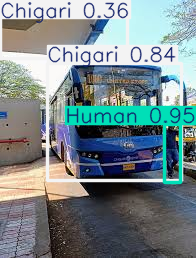

In [ ]:
results = model("/content/test.jpeg")
results[0].show()

In [ ]:
model.train(data="/content/dataset/dataset.yaml", epochs=150, imgsz=640)


Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/dataset/dataset.yaml, epochs=150, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train322, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, sho

train: Scanning /content/dataset/labels/train.cache... 45 images, 0 backgrounds, 0 corrupt: 100%|██████████| 45/45 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/dataset/labels/val.cache... 12 images, 0 backgrounds, 0 corrupt: 100%|██████████| 12/12 [00:00<?, ?it/s]


Plotting labels to runs/detect/train322/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train322
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150      6.87G      2.845      3.683      2.624         58        640: 100%|██████████| 3/3 [00:02<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.25it/s]

                   all         12         26    0.00568      0.136     0.0135    0.00323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150      6.68G       2.91      3.621      2.656         43        640: 100%|██████████| 3/3 [00:01<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.97it/s]

                   all         12         26      0.365     0.0642     0.0125    0.00406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150      6.85G      2.493      3.118      2.331         72        640: 100%|██████████| 3/3 [00:01<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.82it/s]

                   all         12         26      0.739     0.0758     0.0346     0.0151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/150      6.86G      2.229      2.675      2.143         68        640: 100%|██████████| 3/3 [00:01<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.00it/s]

                   all         12         26    0.00755      0.106      0.017    0.00489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/150      6.92G      1.847      2.281      1.873         57        640: 100%|██████████| 3/3 [00:01<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.21it/s]


                   all         12         26    0.00683     0.0758    0.00606    0.00206

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/150      6.86G      1.596      1.943      1.774         59        640: 100%|██████████| 3/3 [00:01<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.36it/s]

                   all         12         26    0.00531     0.0606    0.00369   0.000448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/150      6.99G      1.667      1.927       1.72         78        640: 100%|██████████| 3/3 [00:01<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.91it/s]

                   all         12         26      0.678     0.0303     0.0107    0.00315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/150      6.84G      1.487      1.695      1.646         87        640: 100%|██████████| 3/3 [00:01<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.60it/s]


                   all         12         26      0.819     0.0152     0.0251    0.00943

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/150      6.97G      1.416      1.571      1.573         88        640: 100%|██████████| 3/3 [00:01<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.59it/s]

                   all         12         26       0.74     0.0303     0.0316      0.013



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/150      6.87G      1.371      1.451      1.513         85        640: 100%|██████████| 3/3 [00:01<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.73it/s]

                   all         12         26       0.84     0.0455     0.0508     0.0168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/150      6.96G      1.344       1.52      1.536         45        640: 100%|██████████| 3/3 [00:01<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.29it/s]

                   all         12         26      0.886     0.0583      0.055     0.0251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/150      6.84G      1.283      1.237      1.464         60        640: 100%|██████████| 3/3 [00:01<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.35it/s]

                   all         12         26      0.913     0.0606     0.0688     0.0329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/150      6.97G       1.37      1.343      1.516         46        640: 100%|██████████| 3/3 [00:01<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.66it/s]


                   all         12         26      0.837      0.106      0.101     0.0522

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/150      6.93G      1.307      1.325      1.438         63        640: 100%|██████████| 3/3 [00:01<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.30it/s]


                   all         12         26      0.962      0.119      0.132     0.0684

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/150      6.95G      1.268      1.229      1.419         50        640: 100%|██████████| 3/3 [00:01<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.11it/s]

                   all         12         26      0.963      0.152      0.183     0.0986



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/150      6.84G      1.247      1.146       1.37         68        640: 100%|██████████| 3/3 [00:01<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.15it/s]

                   all         12         26      0.997      0.182      0.393       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/150      6.98G      1.218      1.134      1.339         77        640: 100%|██████████| 3/3 [00:01<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.53it/s]


                   all         12         26      0.929      0.577      0.618      0.339

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/150      6.84G      1.148      1.027      1.347         72        640: 100%|██████████| 3/3 [00:01<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.50it/s]

                   all         12         26      0.959      0.389       0.58      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/150      6.88G      1.175      1.097       1.33         83        640: 100%|██████████| 3/3 [00:01<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.69it/s]

                   all         12         26      0.958      0.401      0.537      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/150      6.88G      1.145      1.042      1.316         73        640: 100%|██████████| 3/3 [00:01<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.52it/s]

                   all         12         26      0.958      0.394      0.523      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/150      6.86G      1.121      1.012      1.348         97        640: 100%|██████████| 3/3 [00:01<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.64it/s]


                   all         12         26      0.903      0.405      0.517      0.274

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/150      6.84G      1.106      1.039      1.383         73        640: 100%|██████████| 3/3 [00:01<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.37it/s]

                   all         12         26      0.792      0.516      0.561      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/150      6.86G      1.114      1.041       1.32         64        640: 100%|██████████| 3/3 [00:01<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.38it/s]

                   all         12         26      0.999      0.572      0.644      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/150      6.88G      1.054     0.9808      1.273         60        640: 100%|██████████| 3/3 [00:01<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.31it/s]

                   all         12         26      0.991       0.55      0.647      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/150      6.87G      1.085     0.8907      1.264         83        640: 100%|██████████| 3/3 [00:01<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.75it/s]

                   all         12         26      0.986      0.534      0.637      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/150      6.85G     0.9968     0.8564      1.218         63        640: 100%|██████████| 3/3 [00:01<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.59it/s]


                   all         12         26       0.99      0.561      0.625       0.32

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/150      6.87G     0.9818     0.8513      1.226         63        640: 100%|██████████| 3/3 [00:01<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.78it/s]

                   all         12         26      0.962      0.572      0.606      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/150      6.86G       1.03     0.8498      1.244        108        640: 100%|██████████| 3/3 [00:01<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.94it/s]

                   all         12         26      0.979      0.576      0.606      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/150      6.88G      1.013     0.8616      1.202         93        640: 100%|██████████| 3/3 [00:01<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.80it/s]

                   all         12         26      0.979      0.576      0.606      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/150      6.95G     0.9433     0.8104      1.216         57        640: 100%|██████████| 3/3 [00:01<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.51it/s]


                   all         12         26      0.909      0.621      0.651      0.369

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/150      6.97G      1.001     0.8621       1.26         64        640: 100%|██████████| 3/3 [00:01<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.60it/s]

                   all         12         26      0.981      0.584      0.689      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/150      6.98G     0.9985     0.8888      1.198         71        640: 100%|██████████| 3/3 [00:01<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.11it/s]

                   all         12         26      0.948       0.59       0.67      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/150      6.87G     0.9621     0.7925      1.198         87        640: 100%|██████████| 3/3 [00:01<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.44it/s]

                   all         12         26      0.948       0.59       0.67      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/150      6.98G     0.9211     0.7785      1.172         67        640: 100%|██████████| 3/3 [00:01<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.26it/s]

                   all         12         26      0.952      0.589      0.666      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/150      6.94G     0.8559     0.7837      1.148         50        640: 100%|██████████| 3/3 [00:01<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.26it/s]

                   all         12         26       0.95      0.598      0.663       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/150      6.95G      1.066     0.9119      1.322         78        640: 100%|██████████| 3/3 [00:01<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.64it/s]

                   all         12         26      0.951      0.621       0.63      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/150      6.87G     0.9966     0.7789      1.197         76        640: 100%|██████████| 3/3 [00:01<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.59it/s]


                   all         12         26      0.951      0.621       0.63      0.361

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/150      6.97G     0.9419     0.7757      1.212         65        640: 100%|██████████| 3/3 [00:01<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.55it/s]

                   all         12         26       0.98      0.613      0.643      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/150      6.94G      0.923     0.7824      1.159         64        640: 100%|██████████| 3/3 [00:01<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.50it/s]

                   all         12         26      0.966      0.561      0.632       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/150      6.97G     0.9241     0.7371      1.149         95        640: 100%|██████████| 3/3 [00:01<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.88it/s]

                   all         12         26      0.964      0.576      0.633       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/150      6.87G     0.9277     0.7135      1.206         64        640: 100%|██████████| 3/3 [00:01<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.95it/s]

                   all         12         26      0.964      0.576      0.633       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/150      6.95G     0.9136     0.7517      1.187         67        640: 100%|██████████| 3/3 [00:01<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.13it/s]

                   all         12         26      0.982      0.606      0.643      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/150      6.96G     0.8872     0.7444      1.142         72        640: 100%|██████████| 3/3 [00:01<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.36it/s]

                   all         12         26      0.976      0.633      0.645      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/150      6.98G     0.9262     0.7773      1.129         90        640: 100%|██████████| 3/3 [00:01<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.63it/s]


                   all         12         26      0.622      0.641      0.642      0.363

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/150      6.87G     0.8896     0.6968      1.172         51        640: 100%|██████████| 3/3 [00:01<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.54it/s]

                   all         12         26      0.622      0.641      0.642      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/150      6.94G     0.9071     0.7081       1.14         83        640: 100%|██████████| 3/3 [00:01<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.43it/s]

                   all         12         26      0.563      0.635      0.633      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/150      6.96G     0.8974     0.6647      1.128         81        640: 100%|██████████| 3/3 [00:01<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.72it/s]

                   all         12         26      0.962      0.443      0.518      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/150      6.97G     0.8443     0.6969      1.102         77        640: 100%|██████████| 3/3 [00:01<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.22it/s]

                   all         12         26      0.976      0.455      0.508      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/150      6.88G     0.9078     0.7181      1.153         67        640: 100%|██████████| 3/3 [00:01<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.10it/s]

                   all         12         26      0.976      0.455      0.508      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/150      6.98G     0.8255     0.6662      1.144         83        640: 100%|██████████| 3/3 [00:01<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.18it/s]


                   all         12         26      0.956      0.424      0.557      0.354

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/150      6.96G     0.8293      0.672      1.108         69        640: 100%|██████████| 3/3 [00:01<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.57it/s]

                   all         12         26      0.587      0.622      0.633      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/150      6.96G     0.8606     0.7235      1.166         78        640: 100%|██████████| 3/3 [00:01<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.27it/s]

                   all         12         26      0.587      0.565      0.608        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/150      6.93G      0.759     0.6463      1.108         63        640: 100%|██████████| 3/3 [00:01<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.49it/s]

                   all         12         26      0.587      0.565      0.608        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/150      6.97G     0.8652     0.6932      1.135         50        640: 100%|██████████| 3/3 [00:01<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.53it/s]

                   all         12         26      0.925      0.546      0.611      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/150      6.96G     0.8878     0.6888      1.132         90        640: 100%|██████████| 3/3 [00:01<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.58it/s]

                   all         12         26      0.997      0.556      0.621      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/150      6.98G     0.7769     0.6163      1.094         74        640: 100%|██████████| 3/3 [00:01<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.15it/s]

                   all         12         26      0.974      0.584      0.633      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/150      6.88G     0.7107     0.6011      1.052         67        640: 100%|██████████| 3/3 [00:01<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.46it/s]

                   all         12         26      0.974      0.584      0.633      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/150      6.99G     0.7632     0.6373      1.065         81        640: 100%|██████████| 3/3 [00:01<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.22it/s]


                   all         12         26      0.964      0.605      0.642      0.398

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/150      7.04G     0.7936     0.6467      1.073         74        640: 100%|██████████| 3/3 [00:01<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.68it/s]

                   all         12         26       0.94      0.455      0.524      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/150      6.99G     0.6783     0.5702      1.062         60        640: 100%|██████████| 3/3 [00:01<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.51it/s]

                   all         12         26      0.881      0.455      0.479      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/150      6.92G     0.6978     0.5664       1.07         49        640: 100%|██████████| 3/3 [00:01<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.49it/s]

                   all         12         26      0.881      0.455      0.479      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/150      6.96G     0.6861     0.5588      1.013         92        640: 100%|██████████| 3/3 [00:01<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.49it/s]

                   all         12         26      0.952      0.455      0.461      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/150      6.96G     0.7135     0.5822      1.058         68        640: 100%|██████████| 3/3 [00:01<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.35it/s]

                   all         12         26       0.98      0.441      0.459      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/150      6.96G     0.6796     0.5924      1.049         91        640: 100%|██████████| 3/3 [00:01<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]

                   all         12         26      0.937      0.439      0.456      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/150      6.88G     0.7549      0.628      1.054         62        640: 100%|██████████| 3/3 [00:01<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.17it/s]

                   all         12         26      0.937      0.439      0.456      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/150      6.98G     0.6878     0.5322      1.058         65        640: 100%|██████████| 3/3 [00:01<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.63it/s]


                   all         12         26      0.936      0.439      0.459      0.252

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/150      6.94G     0.7353     0.5856      1.073         43        640: 100%|██████████| 3/3 [00:01<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.66it/s]

                   all         12         26      0.941      0.438      0.505      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/150      6.97G     0.7141     0.5703      1.036         73        640: 100%|██████████| 3/3 [00:01<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.16it/s]

                   all         12         26      0.901      0.422      0.517      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/150      6.87G     0.7436     0.6054      1.077         65        640: 100%|██████████| 3/3 [00:01<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.14it/s]


                   all         12         26      0.901      0.422      0.517      0.304

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/150       6.9G     0.7387      0.583      1.029         63        640: 100%|██████████| 3/3 [00:01<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.40it/s]

                   all         12         26      0.903      0.406      0.683       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/150      6.97G     0.6697     0.5417      1.028         80        640: 100%|██████████| 3/3 [00:01<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.36it/s]

                   all         12         26      0.429      0.494       0.62      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/150      6.96G     0.6608     0.5489      1.079         64        640: 100%|██████████| 3/3 [00:01<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.58it/s]


                   all         12         26      0.885      0.628      0.807      0.486

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/150      6.85G     0.7167      0.565       1.08         51        640: 100%|██████████| 3/3 [00:01<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.58it/s]

                   all         12         26      0.885      0.628      0.807      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/150      6.97G     0.6742     0.5307       1.03         65        640: 100%|██████████| 3/3 [00:01<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.10it/s]

                   all         12         26      0.945      0.636       0.81      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/150      6.94G     0.6537     0.5365      1.007         73        640: 100%|██████████| 3/3 [00:01<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.83it/s]

                   all         12         26      0.991      0.613      0.731      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/150      6.98G      0.671      0.526      1.048         70        640: 100%|██████████| 3/3 [00:01<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.11it/s]

                   all         12         26      0.954      0.607       0.73      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/150      6.88G     0.6203     0.4921      1.016         69        640: 100%|██████████| 3/3 [00:01<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.38it/s]

                   all         12         26      0.954      0.607       0.73      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/150      6.95G      0.666     0.5383      1.031         70        640: 100%|██████████| 3/3 [00:01<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.65it/s]


                   all         12         26      0.963      0.574      0.729      0.468

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/150      6.98G     0.6079     0.4955      1.001         69        640: 100%|██████████| 3/3 [00:01<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.21it/s]

                   all         12         26      0.959      0.568      0.726      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/150      6.95G      0.742     0.5805      1.098         73        640: 100%|██████████| 3/3 [00:01<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.27it/s]

                   all         12         26      0.963      0.562      0.804      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/150      6.85G     0.6012     0.4659      1.016         58        640: 100%|██████████| 3/3 [00:01<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.05it/s]

                   all         12         26      0.963      0.562      0.804      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/150      6.99G     0.6488     0.5201      1.022         99        640: 100%|██████████| 3/3 [00:01<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.92it/s]

                   all         12         26      0.784      0.788      0.799      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/150      6.98G     0.6569     0.5174     0.9999         67        640: 100%|██████████| 3/3 [00:01<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.01it/s]

                   all         12         26       0.79      0.788        0.8      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/150      6.98G     0.6129      0.483      1.064         66        640: 100%|██████████| 3/3 [00:01<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.72it/s]


                   all         12         26      0.914      0.782      0.803      0.532

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/150      6.89G     0.6378     0.4851      1.026         63        640: 100%|██████████| 3/3 [00:01<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.32it/s]

                   all         12         26      0.914      0.782      0.803      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/150      6.96G     0.6364       0.49      1.016         75        640: 100%|██████████| 3/3 [00:01<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.57it/s]

                   all         12         26      0.921      0.778      0.803       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/150      6.97G     0.6851     0.5326      1.071         48        640: 100%|██████████| 3/3 [00:01<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.20it/s]

                   all         12         26      0.829      0.788        0.8      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/150      6.98G     0.6513     0.4801      1.042         73        640: 100%|██████████| 3/3 [00:01<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.31it/s]


                   all         12         26       0.78      0.636      0.797      0.531

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/150      6.87G     0.6203     0.5321      1.024         69        640: 100%|██████████| 3/3 [00:01<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.37it/s]

                   all         12         26       0.78      0.636      0.797      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/150      6.96G     0.6469     0.5138     0.9979         59        640: 100%|██████████| 3/3 [00:01<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.34it/s]

                   all         12         26      0.957      0.598      0.796      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/150      6.95G     0.6249     0.4912      1.031         69        640: 100%|██████████| 3/3 [00:01<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.68it/s]

                   all         12         26      0.972      0.595      0.685      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/150      6.95G     0.5745     0.4818     0.9735         67        640: 100%|██████████| 3/3 [00:01<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.68it/s]

                   all         12         26      0.971      0.597      0.669      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/150      6.85G     0.6039     0.4794     0.9947         83        640: 100%|██████████| 3/3 [00:01<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.59it/s]

                   all         12         26      0.971      0.597      0.669      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/150      6.95G     0.5952     0.4983      1.028         62        640: 100%|██████████| 3/3 [00:01<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.05it/s]

                   all         12         26      0.965      0.621      0.664      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/150      7.01G      0.552     0.4643     0.9856         58        640: 100%|██████████| 3/3 [00:01<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.63it/s]

                   all         12         26      0.611      0.621      0.651      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/150      6.95G     0.6032     0.4964      1.025         60        640: 100%|██████████| 3/3 [00:01<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.68it/s]


                   all         12         26      0.619      0.624      0.647      0.424

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/150      6.95G     0.5837     0.4703      0.982         69        640: 100%|██████████| 3/3 [00:01<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.45it/s]

                   all         12         26      0.619      0.624      0.647      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/150      7.04G     0.5712     0.4659     0.9878         78        640: 100%|██████████| 3/3 [00:01<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.84it/s]

                   all         12         26      0.467      0.636       0.58       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/150      6.98G     0.5648     0.4704     0.9714         77        640: 100%|██████████| 3/3 [00:01<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.55it/s]

                   all         12         26      0.483      0.636      0.578      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/150      6.98G     0.5173     0.4462     0.9739         64        640: 100%|██████████| 3/3 [00:01<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.25it/s]

                   all         12         26      0.472      0.603      0.581      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/150      6.87G     0.4939      0.412     0.9451         79        640: 100%|██████████| 3/3 [00:01<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]

                   all         12         26      0.472      0.603      0.581      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/150      6.96G     0.5167     0.4229     0.9732         49        640: 100%|██████████| 3/3 [00:01<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.76it/s]


                   all         12         26      0.488      0.636       0.59      0.382

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/150      6.93G     0.4672     0.4149     0.9542         65        640: 100%|██████████| 3/3 [00:01<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.45it/s]

                   all         12         26      0.457      0.636      0.602      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/150      6.98G     0.5202     0.4426     0.9687         70        640: 100%|██████████| 3/3 [00:01<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.63it/s]

                   all         12         26      0.953      0.596      0.674      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/150      6.88G     0.5533     0.4475     0.9925         81        640: 100%|██████████| 3/3 [00:01<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.43it/s]

                   all         12         26      0.953      0.596      0.674      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/150      6.97G     0.5577     0.4484      1.021         89        640: 100%|██████████| 3/3 [00:01<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.41it/s]

                   all         12         26      0.954      0.601      0.675      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/150      6.95G     0.5241     0.4199      0.977         56        640: 100%|██████████| 3/3 [00:01<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.66it/s]

                   all         12         26      0.817      0.636      0.621      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/150      6.99G     0.5338     0.4424     0.9873         58        640: 100%|██████████| 3/3 [00:01<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.57it/s]

                   all         12         26      0.968      0.591      0.679      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/150      6.87G     0.4778     0.4074     0.9523         59        640: 100%|██████████| 3/3 [00:01<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.59it/s]

                   all         12         26      0.968      0.591      0.679      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/150      6.96G     0.5063     0.4199      1.008         46        640: 100%|██████████| 3/3 [00:01<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.67it/s]

                   all         12         26      0.838      0.636      0.624      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/150      6.96G     0.4914     0.4077     0.9458         61        640: 100%|██████████| 3/3 [00:01<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.19it/s]

                   all         12         26      0.843      0.642      0.633      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/150      6.98G     0.4882     0.4109     0.9626         66        640: 100%|██████████| 3/3 [00:01<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.66it/s]


                   all         12         26      0.837      0.636      0.631      0.405

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/150      6.88G     0.5339     0.4216     0.9751         75        640: 100%|██████████| 3/3 [00:01<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.82it/s]


                   all         12         26      0.837      0.636      0.631      0.405

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/150      6.98G     0.5533     0.4411     0.9785         95        640: 100%|██████████| 3/3 [00:01<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.33it/s]

                   all         12         26      0.841      0.636      0.631      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/150      6.98G     0.5354     0.4482     0.9833         72        640: 100%|██████████| 3/3 [00:01<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.51it/s]

                   all         12         26      0.837      0.636      0.618      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/150      6.95G     0.4853     0.4165      0.958         66        640: 100%|██████████| 3/3 [00:01<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.67it/s]

                   all         12         26      0.817      0.636      0.618      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/150      6.86G     0.5222     0.4294     0.9643         66        640: 100%|██████████| 3/3 [00:01<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.68it/s]

                   all         12         26      0.817      0.636      0.618      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/150      6.95G     0.5174     0.4187     0.9582        100        640: 100%|██████████| 3/3 [00:01<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.37it/s]

                   all         12         26      0.479      0.635      0.617       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/150      6.93G     0.5372     0.4418      1.004         57        640: 100%|██████████| 3/3 [00:01<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.04it/s]

                   all         12         26      0.466      0.602      0.614      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/150      6.98G     0.5483     0.4329     0.9617         67        640: 100%|██████████| 3/3 [00:01<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.52it/s]

                   all         12         26      0.471      0.604      0.608       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/150      6.85G     0.4798      0.402     0.9637         88        640: 100%|██████████| 3/3 [00:01<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.80it/s]


                   all         12         26      0.471      0.604      0.608       0.39

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/150      6.96G     0.4447     0.3931     0.9712         78        640: 100%|██████████| 3/3 [00:01<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.09it/s]

                   all         12         26      0.484      0.603      0.604      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/150      6.93G     0.4788     0.3867     0.9509         64        640: 100%|██████████| 3/3 [00:01<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.62it/s]

                   all         12         26      0.477        0.6      0.607      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/150      6.99G     0.4851     0.4147      0.975         41        640: 100%|██████████| 3/3 [00:01<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.41it/s]

                   all         12         26       0.96      0.434      0.574      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/150      6.88G     0.5151     0.4343     0.9841         52        640: 100%|██████████| 3/3 [00:01<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.17it/s]

                   all         12         26       0.96      0.434      0.574      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/150      6.98G     0.5198     0.4265     0.9672         67        640: 100%|██████████| 3/3 [00:01<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.10it/s]

                   all         12         26       0.96      0.431      0.571      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/150      6.95G     0.5267     0.4134      0.969         73        640: 100%|██████████| 3/3 [00:01<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.28it/s]

                   all         12         26      0.486      0.608      0.599      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/150      6.99G     0.4782     0.4074     0.9648         67        640: 100%|██████████| 3/3 [00:01<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.40it/s]

                   all         12         26      0.968      0.424       0.57      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/150      6.88G      0.481     0.3873     0.9558         78        640: 100%|██████████| 3/3 [00:01<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.58it/s]

                   all         12         26      0.968      0.424       0.57      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/150      6.94G     0.4712     0.3847     0.9565         64        640: 100%|██████████| 3/3 [00:01<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.89it/s]

                   all         12         26      0.494      0.616      0.599      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/150      6.95G     0.5208     0.4011     0.9536         70        640: 100%|██████████| 3/3 [00:01<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.94it/s]

                   all         12         26      0.493      0.616      0.603      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/150      6.99G     0.5103     0.4167     0.9598         48        640: 100%|██████████| 3/3 [00:01<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.51it/s]

                   all         12         26      0.495      0.618      0.606      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/150      6.86G     0.4686     0.3897       0.93        103        640: 100%|██████████| 3/3 [00:01<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.71it/s]

                   all         12         26      0.495      0.618      0.606      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/150      6.97G     0.3857      0.367     0.9275         56        640: 100%|██████████| 3/3 [00:01<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.66it/s]

                   all         12         26      0.497      0.622      0.606       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/150      6.94G     0.4133     0.3528       0.96         63        640: 100%|██████████| 3/3 [00:01<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.50it/s]

                   all         12         26        0.5      0.627      0.606      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/150      6.99G     0.4506     0.3821     0.9479         63        640: 100%|██████████| 3/3 [00:01<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.59it/s]

                   all         12         26      0.503      0.634      0.608      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/150      6.85G     0.4738     0.4256     0.9623         42        640: 100%|██████████| 3/3 [00:01<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.75it/s]


                   all         12         26      0.503      0.634      0.608      0.389

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/150      6.94G     0.4521     0.3931     0.9618         59        640: 100%|██████████| 3/3 [00:01<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.11it/s]

                   all         12         26      0.502      0.636      0.609       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/150      6.97G     0.4627     0.3809     0.9705         65        640: 100%|██████████| 3/3 [00:01<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.16it/s]


                   all         12         26        0.5      0.636      0.615      0.397

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/150      6.97G     0.4478     0.3866     0.9331         80        640: 100%|██████████| 3/3 [00:01<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.66it/s]


                   all         12         26      0.498      0.636      0.615      0.395
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/150      6.85G     0.3964     0.4165     0.9257         25        640: 100%|██████████| 3/3 [00:03<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]

                   all         12         26      0.498      0.636      0.615      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/150      6.93G     0.4211     0.4558     0.8857         28        640: 100%|██████████| 3/3 [00:01<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.49it/s]

                   all         12         26      0.499      0.636      0.615      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/150      6.95G     0.3546     0.4236     0.8467         31        640: 100%|██████████| 3/3 [00:01<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.53it/s]

                   all         12         26      0.978      0.622      0.669       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/150      6.96G     0.3942     0.4449      0.897         25        640: 100%|██████████| 3/3 [00:01<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.64it/s]

                   all         12         26      0.979      0.623      0.674      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/150      6.85G     0.3683     0.3947      0.854         39        640: 100%|██████████| 3/3 [00:01<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.68it/s]

                   all         12         26      0.979      0.623      0.674      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/150      6.98G     0.3389     0.3798     0.8624         28        640: 100%|██████████| 3/3 [00:01<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.53it/s]

                   all         12         26      0.977      0.624      0.674      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/150      6.94G     0.3494      0.378     0.8513         28        640: 100%|██████████| 3/3 [00:01<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.50it/s]

                   all         12         26      0.975      0.624      0.675      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/150      6.94G      0.362     0.3862     0.8694         33        640: 100%|██████████| 3/3 [00:01<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.16it/s]

                   all         12         26      0.973      0.623      0.674      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/150      6.87G     0.3545     0.4012      0.864         37        640: 100%|██████████| 3/3 [00:01<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.64it/s]


                   all         12         26      0.973      0.623      0.674      0.438

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/150      6.98G     0.3418     0.3812     0.8778         27        640: 100%|██████████| 3/3 [00:01<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.54it/s]

                   all         12         26       0.49      0.636      0.619      0.405



150 epochs completed in 0.218 hours.
Optimizer stripped from runs/detect/train322/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train322/weights/best.pt, 52.0MB

Validating runs/detect/train322/weights/best.pt...
Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,842,076 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.16it/s]


                   all         12         26      0.828      0.788        0.8      0.545
                   Car          2          2      0.885        0.5      0.496      0.446
               Chigari         12         22      0.865      0.864      0.909      0.593
                 Human          2          2      0.735          1      0.995      0.597
Speed: 0.2ms preprocess, 10.2ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/train322


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7dd1308af6d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04


image 1/1 /content/test1.jpeg: 448x640 1 Chigari, 42.6ms
Speed: 1.9ms preprocess, 42.6ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


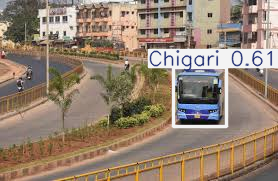

In [ ]:
model = YOLO("runs/detect/train/weights/best.pt")
results = model("/content/test1.jpeg")
results[0].show()


In [ ]:
model.val(data="/content/dataset/dataset.yaml")


Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/dataset/labels/val.cache... 12 images, 0 backgrounds, 0 corrupt: 100%|██████████| 12/12 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.65it/s]


                   all         12         26      0.971      0.212      0.587      0.397
                   Car          2          2          1          0          0          0
               Chigari         12         22      0.913      0.636      0.767      0.497
                 Human          2          2          1          0      0.995      0.696
Speed: 0.3ms preprocess, 6.6ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to runs/detect/val


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7dd0a525c670>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04


image 1/1 /content/test1.jpeg: 448x640 1 Chigari, 12.4ms
Speed: 1.9ms preprocess, 12.4ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 640)


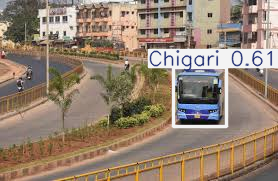

In [ ]:
model = YOLO("runs/detect/train/weights/best.pt")
results = model("/content/test1.jpeg")
results[0].show()


In [ ]:
import shutil

source_path = "runs/detect/train/weights/best.pt"
destination_path = "/content/drive/MyDrive/best.pt"

shutil.copy(source_path, destination_path)

print("File successfully copied to Google Drive!")


File successfully copied to Google Drive!


In [ ]:
!cp runs/detect/train/weights/best.pt /content/drive/MyDrive/


NotImplementedError: A UTF-8 locale is required. Got ANSI_X3.4-1968

In [ ]:
import shutil

source_path = "runs/detect/train/weights/best.pt"
destination_path = "/content/drive/MyDrive/best.pt"

shutil.copy(source_path, destination_path)

print("File successfully copied to Google Drive!")


File successfully copied to Google Drive!
